# Prep 5G TPM data for iModulons
1. Take the log of the TPMs
1. Get the average value for the uMax condition
1. Subtract average uMax value from remaining samples
1. Save this DF
1. Average by condition and also save this DF


In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import random
random.seed(7) #10



import utils as u
import torch_utils as tu

In [2]:
upstream_region_file = 'all_proms/all_loci_upstream_regions_w300_min20.fa'
op_file = 'all_proms/loci_in_top_100perc.txt'
data_mat_file = 'data/extract_TPM_counts.tsv'
sample2cond_file = 'data/sample2condition.txt'
sample_file = None
condition_file = 'data/conditions_to_include_iMod.txt'
coded_meta_file = 'data/5G_exp_metadata_coded.tsv'

COND_COLS = ['carbon_source','oxygen_level','nitrate_level',
             'copper_level','lanthanum_level','growth_rate',
             'growth_mode']


loc2seq, op_leads, tpm_df, sample2condition, samples, conditions, meta_df = u.load_data(
    upstream_region_file,
    op_file,
    data_mat_file, 
    sample2cond_file, 
    sample_file, 
    condition_file,
    coded_meta_file
)

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTATTTAAGAAGGTAGCGAAGAGTAAATAGATGATATTATAAAAAAATTATGCCACTATACAGCAATCAAATCAGTGCCGGCATAATTGACATAAACCGGCGTTTATTCTATCATCCCGGATCTTTTTTATCCGTTTTTGTTAACAATCATCTGAACCAGGATTTAAGGC


In [3]:
print('EQU24_RS19310' in op_leads)
print('EQU24_RS19315' in op_leads)

False
True


In [4]:
tpm_df

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,...,38.557373,38.810668,37.444214,40.246006,40.100118,33.432274,39.880174,38.355431,30.247582,41.248441
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,...,52.552767,52.461746,42.676553,49.210083,46.798476,48.142385,45.465136,46.498139,37.152951,52.902410
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,...,31.350991,34.914128,21.479309,24.204682,22.171104,22.006566,22.658157,22.753325,19.407103,29.834124
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,...,74.848501,80.850761,54.959319,64.911376,59.653059,64.648318,69.119079,65.643179,57.590223,68.306759
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,...,50.324948,49.349547,34.539657,36.521074,37.789611,39.358066,38.992158,35.870964,41.462392,40.227192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,...,70.918047,92.044879,20.691249,26.000334,20.753333,30.766617,22.101468,19.753259,20.027390,24.508375
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,...,328.789579,403.009110,105.587429,138.423469,100.648922,166.101675,96.169044,93.527806,89.780995,130.851229
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,...,301.203428,329.903989,69.198876,75.440610,62.460976,59.523445,47.641158,60.667488,55.739018,66.415222
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,...,550.448048,679.393946,202.139374,195.134615,214.993010,259.828426,134.795621,160.260255,174.197473,164.123473


In [5]:
# save locus info separately - easier to use in other files
#tpm_df[['locus_tag','gene_symbol','product','type']].to_csv("data/locus2info.tsv",sep='\t',index=False)

In [6]:
locus_info_df = pd.read_csv("data/locus2info.tsv",sep='\t')
locus_info_df

,locus_tag,gene_symbol,product,type
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,CDS
1,EQU24_RS00010,NaN,DNA polymerase III subunit beta,CDS
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,CDS
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS
4,EQU24_RS00025,NaN,hypothetical protein,CDS
...,...,...,...,...
4208,EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS
4209,EQU24_RS22140,yidC,membrane protein insertase YidC,CDS
4210,EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD,CDS
4211,EQU24_RS22150,rnpA,ribonuclease P protein component,CDS


In [7]:
locus2info = u.make_info_dict(locus_info_df)
locus2info['EQU24_RS19315']

{'gene': 'pmoC',
 'product': 'methane monooxygenase/ammonia monooxygenase subunit C',
 'type': 'CDS'}

### take log of the tpm_df

In [8]:
# log 2 of the tpms with psuedocount
log_tpm_df = np.log2(tpm_df[samples] + 0.01)
# meta data columns (not samples)
meta_df = tpm_df[tpm_df.columns[~tpm_df.columns.isin(samples)]]
# smush meta and logged vals back together
log_tpm_df = pd.concat([meta_df, log_tpm_df],axis=1)
log_tpm_df.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,...,5.269309,5.278753,5.227056,5.331132,5.325894,5.063601,5.317961,5.261735,4.919225,5.366617
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,...,5.715969,5.713469,5.415710,5.621175,5.548698,5.589535,5.507006,5.539411,5.215793,5.725534
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,...,4.970899,5.126152,4.425547,4.597810,4.471259,4.460518,4.502595,4.508639,4.279256,4.899375
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,...,6.226094,6.337368,5.780555,6.020622,5.898766,6.014764,6.111221,6.036793,5.848002,6.094168
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,...,5.653489,5.625257,5.110600,5.191052,5.240299,5.298954,5.285482,5.165147,5.374079,5.330458


In [9]:
# get the mean of the logged values for each condition
log_tpm_df_means = u.get_gene_means_by_condition(log_tpm_df,samples,sample2condition)
log_tpm_df_means.head()

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00025,EQU24_RS00030,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,...,EQU24_RS22110,EQU24_RS22115,EQU24_RS22120,EQU24_RS22125,EQU24_RS22130,EQU24_RS22135,EQU24_RS22140,EQU24_RS22145,EQU24_RS22150,EQU24_RS22155
0,LanzaTech,4.678877,5.795298,3.561389,6.264543,5.444950,4.794715,5.139060,4.687646,4.552295,...,12.856327,3.997509,3.992235,4.017643,3.213692,5.521138,8.468725,7.294139,9.158138,9.259922
1,MeOH,4.535638,4.227772,4.201007,4.176988,4.070103,3.576916,5.437073,3.254637,2.840722,...,10.308903,3.952667,4.307539,4.657686,4.365095,4.812940,6.502423,7.311239,8.919459,8.026209
2,NO3_lowO2_slow_growth,4.993152,5.438414,4.406897,5.954566,5.378743,4.994378,5.852303,4.072689,3.894680,...,12.637817,4.706588,4.853828,4.554499,4.719703,5.120607,7.469928,7.344060,8.750448,8.944359
3,NoCu,5.446921,5.880545,4.805624,5.815359,5.638454,5.250764,6.305145,5.316422,5.191032,...,12.985411,5.418971,5.094829,5.418883,5.048543,6.023467,7.964803,8.027433,9.473233,10.034635
4,NoLanthanum,5.028937,5.428379,4.519225,5.807097,5.394114,5.368935,6.489753,4.872911,4.270654,...,12.199036,4.007590,5.066007,5.476775,5.430085,4.403872,6.698421,6.048425,7.701581,8.346317


In [10]:
# put the conditions as the columns
log_tpm_df_meansT = log_tpm_df_means.set_index('exp_condition').T
log_tpm_df_meansT

exp_condition,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
locus_tag,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,4.678877,4.535638,4.993152,5.446921,5.028937,5.056599,5.110744,4.742944,5.274031,5.573513,5.995897,4.937488,5.400581,5.141100,3.117446,5.484672,5.185414,5.692640,3.746434
EQU24_RS00010,5.795298,4.227772,5.438414,5.880545,5.428379,5.236712,5.346253,5.506773,5.714719,6.293874,6.610619,5.038644,5.927308,5.418700,2.878822,6.019007,5.611599,5.895559,3.592704
EQU24_RS00015,3.561389,4.201007,4.406897,4.805624,4.519225,3.883959,4.326002,3.540662,5.048526,5.059846,5.474520,4.196587,4.827413,4.759295,2.194612,4.877122,4.092404,5.081055,3.092134
EQU24_RS00020,6.264543,4.176988,5.954566,5.815359,5.807097,5.695010,5.780471,5.802058,6.281731,6.189602,6.303382,5.408889,5.935105,5.600527,3.264681,6.028345,6.025920,6.143691,4.843888
EQU24_RS00025,5.444950,4.070103,5.378743,5.638454,5.394114,5.145553,5.082986,5.042143,5.639373,5.598345,6.242508,4.969610,5.655301,5.013012,2.718232,5.589111,5.472908,5.566137,4.263294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,5.521138,4.812940,5.120607,6.023467,4.403872,5.072960,4.394975,4.896295,6.336353,6.486981,5.698680,5.906325,6.049997,6.161572,2.762688,6.400936,4.913629,6.474245,4.850176
EQU24_RS22140,8.468725,6.502423,7.469928,7.964803,6.698421,7.422479,6.559458,7.506212,8.507885,8.419234,7.782292,7.820145,8.175158,8.352401,4.545885,8.406151,7.386697,8.745543,6.063722
EQU24_RS22145,7.294139,7.311239,7.344060,8.027433,6.048425,7.503533,6.132579,7.240339,8.300294,8.591087,7.916312,8.210203,8.243835,8.534490,5.140564,8.558719,7.532941,8.807329,6.190018


In [11]:
# melt ot make box plot
log_tpm_df_meansT_melt = pd.melt(log_tpm_df_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_tpm_df_meansT_melt

,locus_tag,exp_condition,tpm
0,EQU24_RS00005,LanzaTech,4.678877
1,EQU24_RS00010,LanzaTech,5.795298
2,EQU24_RS00015,LanzaTech,3.561389
3,EQU24_RS00020,LanzaTech,6.264543
4,EQU24_RS00025,LanzaTech,5.444950
...,...,...,...
80042,EQU24_RS22135,unknown,4.850176
80043,EQU24_RS22140,unknown,6.063722
80044,EQU24_RS22145,unknown,6.190018
80045,EQU24_RS22150,unknown,7.538324


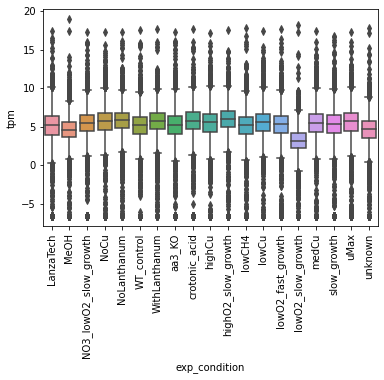

In [12]:
sns.boxplot(data=log_tpm_df_meansT_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.show()

### normalize the log TPM df to uMax condition by subtracting the uMax average for each gene

In [14]:
# copy the log tpm df
log_norm_uMax = log_tpm_df.copy(deep=True)
# for each sample, subtract the uMax mean value from the log value (log2 ratio (sample_val/umax_val))
for s in samples:
    log_norm_uMax[s] = log_norm_uMax[s].values - log_tpm_df_meansT['uMax'].values

log_norm_uMax

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200


In [15]:
# check a quick boxplot of log normed tpm data
log_norm_uMax_melt = pd.melt(log_norm_uMax[["locus_tag"]+samples], id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_norm_uMax_melt['cond'] = log_norm_uMax_melt['exp_condition'].apply(lambda x: sample2condition[x])
log_norm_uMax_melt

,locus_tag,exp_condition,tpm,cond
0,EQU24_RS00005,5GB1_ferm_Ack_QC_tpm,-4.135351,lowO2_slow_growth
1,EQU24_RS00010,5GB1_ferm_Ack_QC_tpm,-5.201540,lowO2_slow_growth
2,EQU24_RS00015,5GB1_ferm_Ack_QC_tpm,-4.569572,lowO2_slow_growth
3,EQU24_RS00020,5GB1_ferm_Ack_QC_tpm,-4.461081,lowO2_slow_growth
4,EQU24_RS00025,5GB1_ferm_Ack_QC_tpm,-4.950035,lowO2_slow_growth
...,...,...,...,...
412869,EQU24_RS22135,5GB1C-JG15-N-BR2_tpm,-1.858454,NoLanthanum
412870,EQU24_RS22140,5GB1C-JG15-N-BR2_tpm,-1.713649,NoLanthanum
412871,EQU24_RS22145,5GB1C-JG15-N-BR2_tpm,-2.753670,NoLanthanum
412872,EQU24_RS22150,5GB1C-JG15-N-BR2_tpm,-2.979200,NoLanthanum


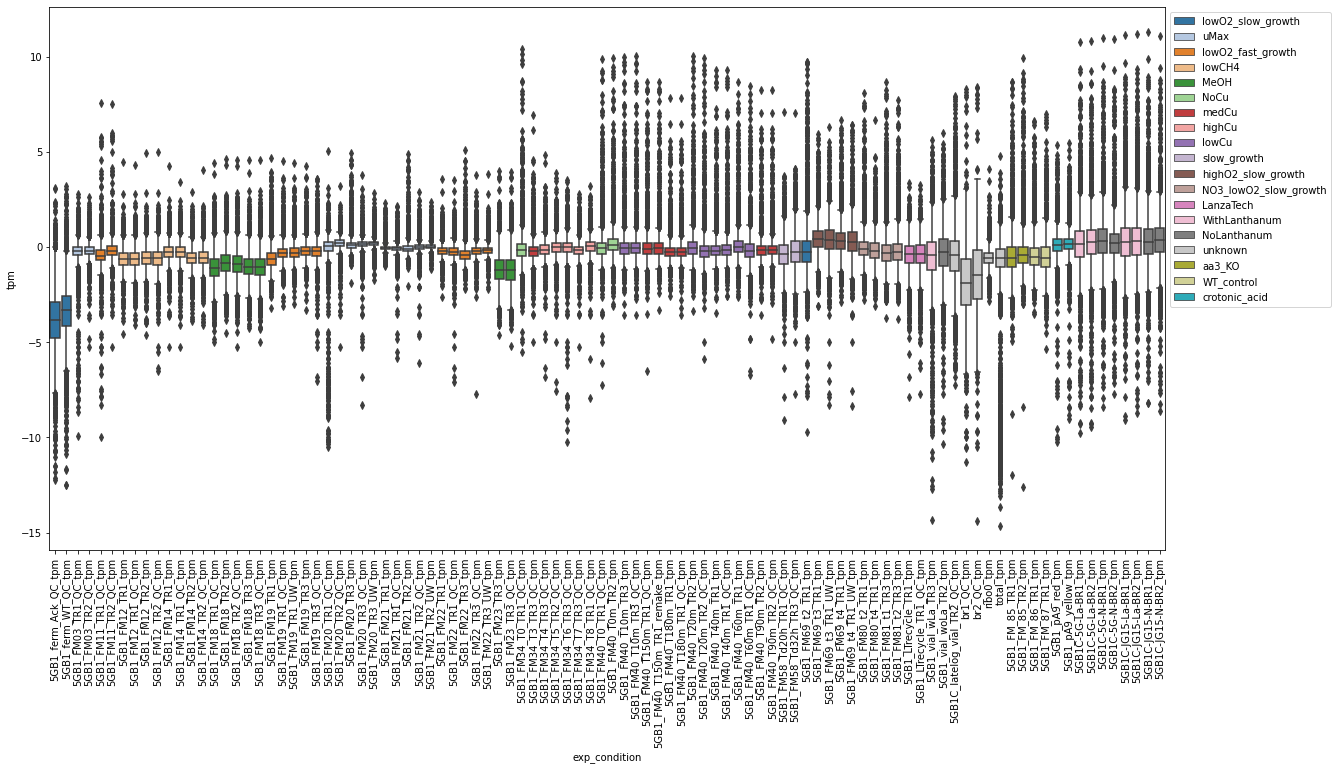

In [16]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=log_norm_uMax_melt,x="exp_condition",y="tpm",hue='cond',dodge=False,palette='tab20')
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Get the means of the log normed data

In [17]:
log_norm_uMax_means = u.get_gene_means_by_condition(log_norm_uMax,samples,sample2condition)
log_norm_uMax_means

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00025,EQU24_RS00030,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,...,EQU24_RS22110,EQU24_RS22115,EQU24_RS22120,EQU24_RS22125,EQU24_RS22130,EQU24_RS22135,EQU24_RS22140,EQU24_RS22145,EQU24_RS22150,EQU24_RS22155
0,LanzaTech,-1.013763e+00,-1.002613e-01,-1.519666e+00,1.208519e-01,-1.211870e-01,-1.119447e-01,-1.250900e+00,0.269591,4.007210e-01,...,-2.018197e-01,-1.428416e+00,-1.263288e+00,-1.453401e+00,-1.684150e+00,-9.531072e-01,-2.768182e-01,-1.513190e+00,-1.179788e+00,-1.121891e+00
1,MeOH,-1.157002e+00,-1.667787e+00,-8.800482e-01,-1.966703e+00,-1.496034e+00,-1.329744e+00,-9.528869e-01,-1.163417,-1.310852e+00,...,-2.749244e+00,-1.473258e+00,-9.479845e-01,-8.133584e-01,-5.327477e-01,-1.661306e+00,-2.243120e+00,-1.496090e+00,-1.418467e+00,-2.355604e+00
2,NO3_lowO2_slow_growth,-6.994879e-01,-4.571448e-01,-6.741588e-01,-1.891252e-01,-1.873941e-01,8.771809e-02,-5.376570e-01,-0.345365,-2.568934e-01,...,-4.203294e-01,-7.193371e-01,-4.016956e-01,-9.165452e-01,-1.781398e-01,-1.353638e+00,-1.275615e+00,-1.463269e+00,-1.587478e+00,-1.437454e+00
3,NoCu,-2.457192e-01,-1.501390e-02,-2.754318e-01,-3.283322e-01,7.231724e-02,3.441043e-01,-8.481445e-02,0.898367,1.039458e+00,...,-7.273537e-02,-6.953623e-03,-1.606939e-01,-5.216141e-02,1.507006e-01,-4.507783e-01,-7.807403e-01,-7.798968e-01,-8.646934e-01,-3.471779e-01
4,NoLanthanum,-6.637038e-01,-4.671795e-01,-5.618308e-01,-3.365938e-01,-1.720230e-01,4.622751e-01,9.979350e-02,0.454857,1.190803e-01,...,-8.591106e-01,-1.418335e+00,-1.895164e-01,5.730532e-03,5.322423e-01,-2.070373e+00,-2.047122e+00,-2.758904e+00,-2.636345e+00,-2.035496e+00
5,WT_control,-6.360409e-01,-6.588465e-01,-1.197097e+00,-4.486812e-01,-4.205836e-01,-1.739605e-01,-5.527362e-01,0.212874,6.389087e-01,...,-8.086109e-01,-1.346036e+00,-8.905748e-01,-5.054296e-01,5.463028e-01,-1.401285e+00,-1.323064e+00,-1.303797e+00,-1.681320e+00,-1.043121e+00
6,WithLanthanum,-5.818968e-01,-5.493058e-01,-7.550531e-01,-3.632195e-01,-4.831506e-01,5.513678e-01,2.428409e-01,0.347248,2.395080e-02,...,-1.151591e+00,-1.484962e+00,-2.210601e-01,1.415469e-01,3.688750e-01,-2.079270e+00,-2.186085e+00,-2.674750e+00,-2.779149e+00,-2.068555e+00
7,aa3_KO,-9.496967e-01,-3.887858e-01,-1.540393e+00,-3.416331e-01,-5.239937e-01,-6.991761e-02,-7.553323e-01,0.008238,4.790821e-01,...,-7.071067e-01,-1.436123e+00,-9.080372e-01,-6.581238e-01,4.463793e-01,-1.577950e+00,-1.239331e+00,-1.566991e+00,-1.805138e+00,-1.039685e+00
8,crotonic_acid,-4.186094e-01,-1.808398e-01,-3.252966e-02,1.380402e-01,7.323593e-02,3.149068e-01,-2.701582e-01,0.573402,1.012569e+00,...,2.463634e-02,-3.337775e-02,3.259495e-01,4.041620e-01,5.281675e-01,-1.378920e-01,-2.376586e-01,-5.070352e-01,-1.081619e+00,-9.830047e-01
9,highCu,-1.191272e-01,3.983154e-01,-2.120915e-02,4.591150e-02,3.220758e-02,1.366023e-01,1.408995e-01,1.271947,1.473417e+00,...,-6.895150e-02,1.551855e-01,-1.518382e-01,4.933591e-03,-3.394426e-02,1.273525e-02,-3.263091e-01,-2.162421e-01,-3.435036e-01,3.366015e-01


In [18]:
log_norm_uMax_meansT = log_norm_uMax_means.set_index('exp_condition').T
log_norm_uMax_meansT

exp_condition,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
locus_tag,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-1.013763,-1.157002,-0.699488,-0.245719,-0.663704,-0.636041,-0.581897,-0.949697,-0.418609,-0.119127,0.303257,-0.755152,-0.292059,-0.551540,-2.575194,-0.207968,-0.507227,-9.621933e-16,-1.946206
EQU24_RS00010,-0.100261,-1.667787,-0.457145,-0.015014,-0.467179,-0.658847,-0.549306,-0.388786,-0.180840,0.398315,0.715060,-0.856915,0.031749,-0.476859,-3.016737,0.123448,-0.283960,-2.220446e-16,-2.302855
EQU24_RS00015,-1.519666,-0.880048,-0.674159,-0.275432,-0.561831,-1.197097,-0.755053,-1.540393,-0.032530,-0.021209,0.393465,-0.884468,-0.253642,-0.321760,-2.886444,-0.203934,-0.988652,-4.440892e-16,-1.988922
EQU24_RS00020,0.120852,-1.966703,-0.189125,-0.328332,-0.336594,-0.448681,-0.363220,-0.341633,0.138040,0.045912,0.159691,-0.734801,-0.208586,-0.543164,-2.879010,-0.115346,-0.117771,-6.661338e-16,-1.299803
EQU24_RS00025,-0.121187,-1.496034,-0.187394,0.072317,-0.172023,-0.420584,-0.483151,-0.523994,0.073236,0.032208,0.676371,-0.596527,0.089164,-0.553125,-2.847905,0.022974,-0.093229,-1.036208e-15,-1.302843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,-0.953107,-1.661306,-1.353638,-0.450778,-2.070373,-1.401285,-2.079270,-1.577950,-0.137892,0.012735,-0.775565,-0.567920,-0.424248,-0.312673,-3.711558,-0.073309,-1.560616,7.401487e-16,-1.624069
EQU24_RS22140,-0.276818,-2.243120,-1.275615,-0.780740,-2.047122,-1.323064,-2.186085,-1.239331,-0.237659,-0.326309,-0.963252,-0.925398,-0.570385,-0.393142,-4.199658,-0.339392,-1.358846,2.960595e-16,-2.681821
EQU24_RS22145,-1.513190,-1.496090,-1.463269,-0.779897,-2.758904,-1.303797,-2.674750,-1.566991,-0.507035,-0.216242,-0.891018,-0.597127,-0.563494,-0.272840,-3.666766,-0.248610,-1.274388,1.184238e-15,-2.617311


In [19]:
# check a quick boxplot of mean tpm data
log_norm_uMax_meansT_melt = pd.melt(log_norm_uMax_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_norm_uMax_meansT_melt

,locus_tag,exp_condition,tpm
0,EQU24_RS00005,LanzaTech,-1.013763
1,EQU24_RS00010,LanzaTech,-0.100261
2,EQU24_RS00015,LanzaTech,-1.519666
3,EQU24_RS00020,LanzaTech,0.120852
4,EQU24_RS00025,LanzaTech,-0.121187
...,...,...,...
80042,EQU24_RS22135,unknown,-1.624069
80043,EQU24_RS22140,unknown,-2.681821
80044,EQU24_RS22145,unknown,-2.617311
80045,EQU24_RS22150,unknown,-2.799602


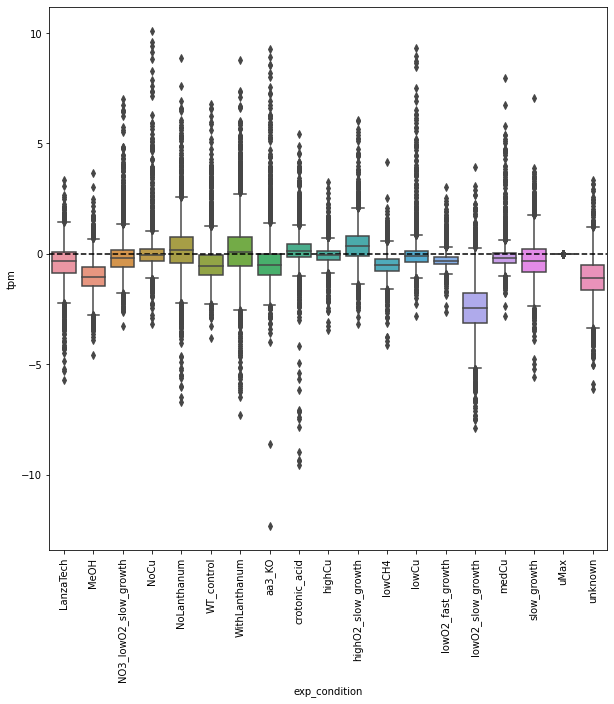

In [22]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=log_norm_uMax_meansT_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.axhline(0,c='k',linestyle='--')
plt.show()

In [30]:
log_tpm_df_meansT['uMax']

locus_tag
EQU24_RS00005     5.692640
EQU24_RS00010     5.895559
EQU24_RS00015     5.081055
EQU24_RS00020     6.143691
EQU24_RS00025     5.566137
                   ...    
EQU24_RS22135     6.474245
EQU24_RS22140     8.745543
EQU24_RS22145     8.807329
EQU24_RS22150    10.337926
EQU24_RS22155    10.381813
Name: uMax, Length: 4213, dtype: float64

In [32]:
log_tpm_df['5GB1C-JG15-N-BR2_tpm'].values - log_tpm_df_meansT['uMax'].values

array([-0.326023  , -0.17002468, -0.18168039, ..., -2.75367016,
       -2.97920038, -2.14454928])

In [28]:
log_norm_uMax['5GB1C-JG15-N-BR2_tpm']

0      -0.326023
1      -0.170025
2      -0.181680
3      -0.049523
4      -0.235679
          ...   
4208   -1.858454
4209   -1.713649
4210   -2.753670
4211   -2.979200
4212   -2.144549
Name: 5GB1C-JG15-N-BR2_tpm, Length: 4213, dtype: float64

In [33]:
umax_samps = [x for x in sample2condition if sample2condition[x]=='uMax']
umax_samps

['5GB1_FM03_TR1_QC_tpm',
 '5GB1_FM03_TR2_QC_tpm',
 '5GB1_FM20_TR1_QC_tpm',
 '5GB1_FM20_TR2_QC_tpm',
 '5GB1_FM20_TR3_tpm',
 '5GB1_FM20_TR3_QC_tpm',
 '5GB1_FM20_TR3_UW_tpm',
 '5GB1_FM21_TR1_tpm',
 '5GB1_FM21_TR1_QC_tpm',
 '5GB1_FM21_TR2_tpm',
 '5GB1_FM21_TR2_QC_tpm',
 '5GB1_FM21_TR2_UW_tpm']

In [42]:
tpm_desc = tpm_df[['locus_tag']+umax_samps].set_index('locus_tag').T.describe()

In [49]:
tpm_desc.T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
locus_tag,,,,,,,,
EQU24_RS08045,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS21615,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS12090,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS12820,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS03550,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
EQU24_RS16195,12.0,14727.200575,4957.293425,8854.129384,12301.915273,13372.309014,14325.215076,24834.049426
EQU24_RS19315,12.0,46680.019250,7332.585597,31653.422741,44508.268944,50567.086795,51745.615562,52760.682597
EQU24_RS19765,12.0,69142.260085,19243.540759,35414.116313,56588.931981,71642.529367,77777.045959,103629.302622


In [50]:
log_tpm_desc = log_tpm_df[['locus_tag']+umax_samps].set_index('locus_tag').T.describe()

In [56]:
log_tpm_desc.T[log_tpm_desc.T['std']>1.0]

,count,mean,std,min,25%,50%,75%,max
locus_tag,,,,,,,,
EQU24_RS00075,12.0,1.691891,2.718325,-6.643856,2.049444,2.580082,2.880055,3.351289
EQU24_RS00145,12.0,1.401684,2.537494,-6.643856,2.008551,2.078089,2.210327,2.403413
EQU24_RS00175,12.0,-1.384467,3.199413,-6.643856,-2.148223,0.437529,0.586964,1.001895
EQU24_RS00180,12.0,0.470833,2.271432,-6.643856,0.752291,1.101841,1.363000,1.702797
EQU24_RS00190,12.0,3.320236,3.156268,-6.643856,3.950206,4.191005,4.516886,4.630009
...,...,...,...,...,...,...,...,...
EQU24_RS20905,12.0,-3.295305,2.580549,-6.643856,-6.643856,-2.264566,-1.257682,-0.359003
EQU24_RS20950,12.0,-3.994285,2.501624,-6.643856,-6.643856,-3.046892,-2.598006,-0.322940
EQU24_RS20980,12.0,-0.049943,2.119201,-6.643856,0.165998,0.381827,0.853672,1.308227


<AxesSubplot:>

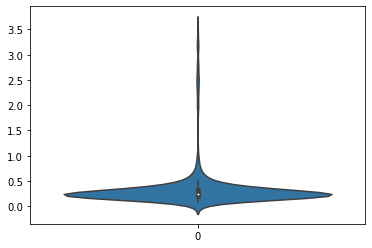

In [53]:
sns.violinplot(data=log_tpm_desc.loc['std'])

129 genes with somewhat high std in the uMax conditions?? Is this a problem?

## Save data frames

In [25]:
out_df = log_norm_uMax[['locus_tag']+samples]
out_df

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-5.266254,-4.783630,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,-6.347307,-5.097497,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,-5.574703,-4.409324,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,-5.900466,-4.936556,-0.119272,-0.070209,-0.957250,-0.589300,-0.643860,-0.659820,-0.675180,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200


In [59]:
out_df.to_csv('data/log_norm_uMax_indiv.csv',index=False)

In [61]:
test_load = pd.read_csv('data/log_norm_uMax_indiv.csv',index_col=0)
test_load

,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,-5.266254,-4.783630,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,-0.361413,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
EQU24_RS22140,-6.347307,-5.097497,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,-0.973605,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
EQU24_RS22145,-5.574703,-4.409324,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,-0.496199,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670


In [66]:
log_norm_uMax_meansT.to_csv('data/log_norm_uMax_cond.csv')

In [67]:
test_load = pd.read_csv('data/log_norm_uMax_cond.csv',index_col=0)
test_load

,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
locus_tag,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-1.013763,-1.157002,-0.699488,-0.245719,-0.663704,-0.636041,-0.581897,-0.949697,-0.418609,-0.119127,0.303257,-0.755152,-0.292059,-0.551540,-2.575194,-0.207968,-0.507227,-9.621933e-16,-1.946206
EQU24_RS00010,-0.100261,-1.667787,-0.457145,-0.015014,-0.467179,-0.658847,-0.549306,-0.388786,-0.180840,0.398315,0.715060,-0.856915,0.031749,-0.476859,-3.016737,0.123448,-0.283960,-2.220446e-16,-2.302855
EQU24_RS00015,-1.519666,-0.880048,-0.674159,-0.275432,-0.561831,-1.197097,-0.755053,-1.540393,-0.032530,-0.021209,0.393465,-0.884468,-0.253642,-0.321760,-2.886444,-0.203934,-0.988652,-4.440892e-16,-1.988922
EQU24_RS00020,0.120852,-1.966703,-0.189125,-0.328332,-0.336594,-0.448681,-0.363220,-0.341633,0.138040,0.045912,0.159691,-0.734801,-0.208586,-0.543164,-2.879010,-0.115346,-0.117771,-6.661338e-16,-1.299803
EQU24_RS00025,-0.121187,-1.496034,-0.187394,0.072317,-0.172023,-0.420584,-0.483151,-0.523994,0.073236,0.032208,0.676371,-0.596527,0.089164,-0.553125,-2.847905,0.022974,-0.093229,-1.036208e-15,-1.302843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,-0.953107,-1.661306,-1.353638,-0.450778,-2.070373,-1.401285,-2.079270,-1.577950,-0.137892,0.012735,-0.775565,-0.567920,-0.424248,-0.312673,-3.711558,-0.073309,-1.560616,7.401487e-16,-1.624069
EQU24_RS22140,-0.276818,-2.243120,-1.275615,-0.780740,-2.047122,-1.323064,-2.186085,-1.239331,-0.237659,-0.326309,-0.963252,-0.925398,-0.570385,-0.393142,-4.199658,-0.339392,-1.358846,2.960595e-16,-2.681821
EQU24_RS22145,-1.513190,-1.496090,-1.463269,-0.779897,-2.758904,-1.303797,-2.674750,-1.566991,-0.507035,-0.216242,-0.891018,-0.597127,-0.563494,-0.272840,-3.666766,-0.248610,-1.274388,1.184238e-15,-2.617311
